### Explore Data Set
This data set is provided by the City of Los Angeles and it contains data on all 911 calls to the LAPD in 2015.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
Calls_2015_DB = pd.read_csv("LAPD_Calls_for_Service_2015.csv")

In [21]:
Calls_2015_DB.head()

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description
0,151229000818,2083,Olympic,12/29/2015,07:24:24,415M,MAN
1,151220000848,1365,Newton,12/20/2015,06:10:55,507O,OTHER
2,151220000748,1283,77th Street,12/20/2015,04:11:53,918F,FEM
3,151219004185,941,Van Nuys,12/19/2015,22:29:22,507R,RADIO
4,151219001308,2126,Topanga,12/19/2015,09:47:28,242SN,SUSP NOW


In [22]:
#Checking for NaN values. Data set has no NaN values.

print(Calls_2015_DB.count())
len(Calls_2015_DB['Incident Number'])

Incident Number          961870
Reporting District       961870
Area Occurred            961870
Dispatch Date            961870
Dispatch Time            961870
Call Type Code           961870
Call Type Description    961870
dtype: int64


961870

In [23]:
Calls_2015_DB.dtypes

Incident Number           int64
Reporting District        int64
Area Occurred            object
Dispatch Date            object
Dispatch Time            object
Call Type Code           object
Call Type Description    object
dtype: object

In [24]:
print(type(Calls_2015_DB['Dispatch Date'][0]))
type(Calls_2015_DB['Dispatch Time'][0])

<class 'str'>


str

In [25]:
#Converting Dispatch Time and Dispatch Date to Datetime dtype
#time = []
#for time in Calls_2015_DB['Dispatch Time']:
   # time.append(datetime.strptime(time, '%H:%M:%S').time())
    
#Calls_2015_DB['Dispatch Time'] = time

Calls_2015_DB['Dispatch Time'] = pd.to_datetime(Calls_2015_DB['Dispatch Time'], format = "%H:%M:%S")
Calls_2015_DB['Dispatch Date'] = pd.to_datetime(Calls_2015_DB['Dispatch Date'], format = "%m/%d/%Y")


In [26]:
Calls_2015_DB[["Call Type Description", 'Incident Number']].groupby(['Call Type Description']).count().to_csv('crimes_types.csv')

In [27]:
#I selected 9 types of crimes that were common and dangerous for police officers.

urgent_crimes = ['DOM VIOL','MAN ASSLTG WMN','SHOTS FIRED J/O','415 GROUP GANG ACT','MAN W/KNIVES','MAN W/GUN','AMB SHOTS FIRED','VIOLENT MALE','GTA J/O']

#Subset data set to be just the dangerous crimes

Urg_Calls_15_DB = Calls_2015_DB.loc[Calls_2015_DB["Call Type Description"].isin(urgent_crimes), :]

In [28]:
crimes_by_date = Urg_Calls_15_DB[["Dispatch Date","Incident Number"]].groupby("Dispatch Date").count()


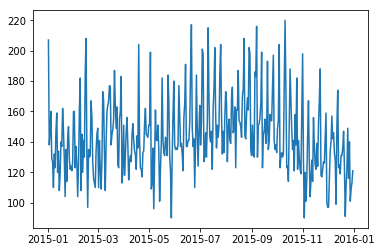

In [29]:
plt.plot(crimes_by_date)
plt.show()

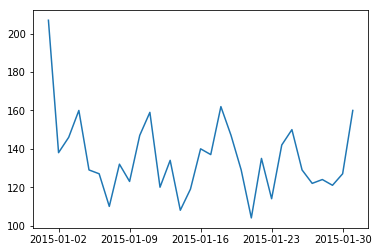

In [30]:
#Zooming in on January
plt.plot(crimes_by_date.loc[crimes_by_date.index <'2015-02-01',:])
plt.show()


In [31]:
#I will start my analysis with the day after New Years. Weekday 4 means Friday

crimes_by_date.index[1].weekday()


4

In [32]:
crimes_by_date.loc[crimes_by_date.index <'2015-02-01',:].to_csv('January_Calls.csv')

In [33]:
#I'll also analyze the month of August because it has no holidays.

crimes_by_date.loc[(crimes_by_date.index >='2015-08-01') & (crimes_by_date.index <'2015-08-31') ,:].to_csv('August_Calls.csv')